In [170]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from bregman_kit.BregmanClustering import BregmanHardClustering
from bregman_kit.utils import squared_euclidean, kl_divergence, itakura_saito, plot_clusters
from sklearn.metrics import adjusted_rand_score, mutual_info_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

In [246]:
df1 = pd.read_csv("train.csv")
df2 = pd.read_csv("test.csv")

In [247]:
df = pd.concat([df1, df2])

In [248]:
df.head()

,id,chromogram_0_0,chromogram_0_1,chromogram_0_10,chromogram_0_11,chromogram_0_12,chromogram_0_2,chromogram_0_3,chromogram_0_4,chromogram_0_5,...,spec_centr_12,spec_centr_2,spec_centr_3,spec_centr_4,spec_centr_5,spec_centr_6,spec_centr_7,spec_centr_8,spec_centr_9,species
0,0,0.997944,0.832392,0.765386,0.704275,0.655724,0.331064,0.927524,0.307601,0.492226,...,2507.041444,2730.515996,2609.940118,2703.391485,2676.400501,2818.375970,2706.119792,2740.820762,2684.624946,flammea
1,1,0.996255,0.839120,0.760417,0.705142,0.662990,0.329859,0.924461,0.300951,0.493679,...,2490.339399,2730.212864,2609.668564,2703.721292,2676.695013,2818.554958,2705.497472,2741.509333,2683.727859,flammea
2,2,0.970810,0.823540,0.759508,0.709058,0.659750,0.336233,0.933035,0.301501,0.491263,...,2497.486714,2729.438087,2609.010529,2704.515718,2677.465965,2818.971388,2703.952638,2743.213960,2681.482884,flammea
3,3,1.000000,0.855558,0.752038,0.710977,0.664579,0.334564,0.928026,0.292012,0.493557,...,2503.217602,2728.961249,2608.631818,2704.971676,2677.953716,2819.200288,2703.033515,2744.224849,2680.133570,flammea
4,4,1.000000,0.884305,0.741885,0.714775,0.672465,0.329072,0.912804,0.279094,0.501200,...,2523.364512,2728.800252,2608.508516,2705.120155,2678.118949,2819.273155,2702.728487,2744.559785,2679.683390,flammea


In [249]:
X, y = df.drop(columns=['id', 'genus', 'species']).to_numpy(), df['species'].to_numpy()

In [250]:
len(np.unique(y))

85

In [254]:
def plot_clusters(data, labels=None, centroids=None, show_clusters_n=True):
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(np.unique(labels)))]
    if (labels is None):
        plt.scatter(data[:, 0], data[:, 1])
    else:
        unique_labels = np.unique(labels)
        for i, label in enumerate(unique_labels):
            cluster_points = data[labels == label]
            if (show_clusters_n):
                plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f'Cluster {label}')
            else:
                plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i])
    if (centroids is not None):
        plt.scatter(centroids[:, 0], centroids[:, 1], marker="*", color="black", s=200, label='Centroids')

    plt.legend()
    plt.show()

Squared Euclidean
Davis-Boildin Index: 1.009160531636726
Adjusted Rand Score: 0.38543317246608666
Mutual Inforamtion Score: 3.1075036807418437


C:\Users\Ikbal\AppData\Local\Temp\ipykernel_12400\3056366980.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


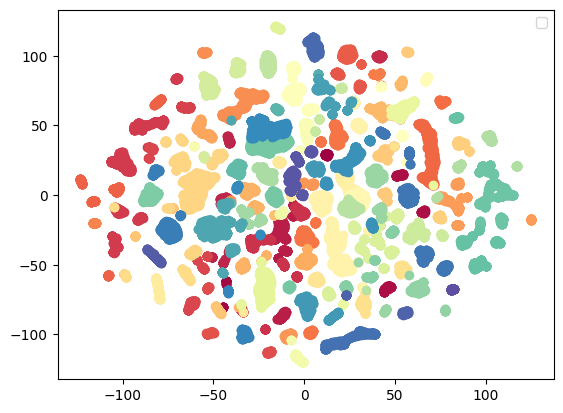

In [ ]:
model = BregmanHardClustering(85, squared_euclidean)
model.fit(X)
predict = model.predict(X)

print("Squared Euclidean")
print(f"Davis-Boildin Index: {davies_bouldin_score(X, predict)}")
print(f"Adjusted Rand Score: {adjusted_rand_score(y, predict)}")
print(f"Mutual Inforamtion Score: {mutual_info_score(y, predict)}")

reduced = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X)

plot_clusters(reduced, predict, None, False)

Itakura Saito divergence
Davis-Boildin Index: 6.772312555886705
Adjusted Rand Score: 0.3980211418385258
Mutual Inforamtion Score: 3.0788331338141663


C:\Users\Ikbal\AppData\Local\Temp\ipykernel_12400\3056366980.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


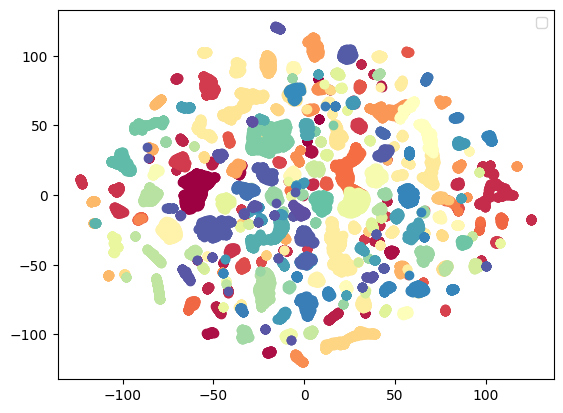

In [258]:
model = BregmanHardClustering(85, itakura_saito)

model.fit(X)
predict = model.predict(X)

print("Itakura Saito divergence")
print(f"Davis-Boildin Index: {davies_bouldin_score(X, predict)}")
print(f"Adjusted Rand Score: {adjusted_rand_score(y, predict)}")
print(f"Mutual Inforamtion Score: {mutual_info_score(y, predict)}")

reduced = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X)

plot_clusters(reduced, predict, None, False)

KL divergence
Davis-Boildin Index: 1.6573253103102752
Adjusted Rand Score: 0.3897996161262521
Mutual Inforamtion Score: 3.1244932680448323


C:\Users\Ikbal\AppData\Local\Temp\ipykernel_12400\3056366980.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


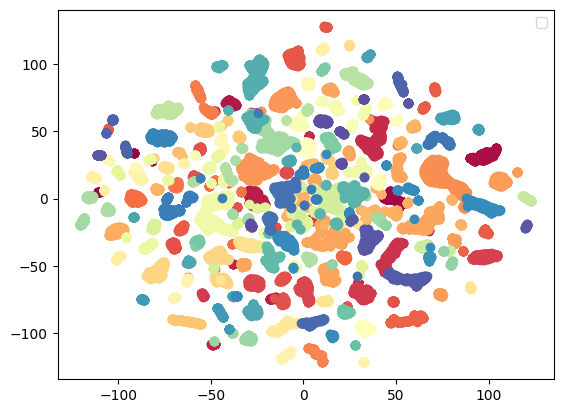

In [259]:
X_simplex = np.array([
    v / np.sum(v)
    for v in X
])

model = BregmanHardClustering(85, kl_divergence)
model.fit(X_simplex)
predict = model.predict(X_simplex)

print("KL divergence")
print(f"Davis-Boildin Index: {davies_bouldin_score(X_simplex, predict)}")
print(f"Adjusted Rand Score: {adjusted_rand_score(y, predict)}")
print(f"Mutual Inforamtion Score: {mutual_info_score(y, predict)}")

reduced = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X_simplex)

plot_clusters(reduced, predict, None, False)